Github Link:

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [52]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

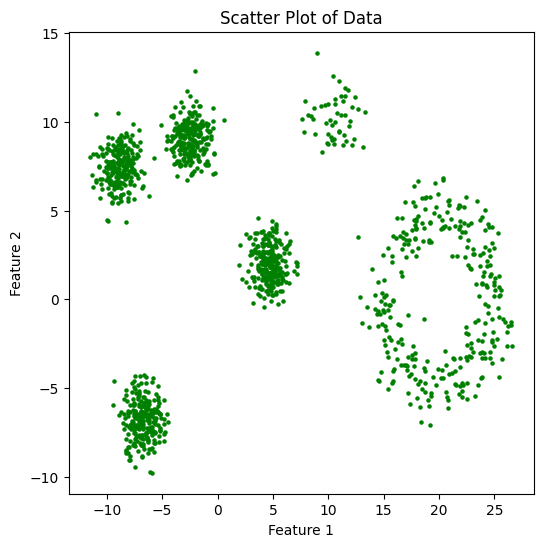

In [53]:
import pandas as pd

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Pair plot using Seaborn with only the lower triangle
plt.figure(figsize=(6, 6))
plt.scatter(df['Feature 1'], df['Feature 2'], c='green', s=5)
plt.title("Scatter Plot of Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [56]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_kmeans_score = -1
best_kmeans_n_clusters = -1
min_clusters = 2
max_clusters = 15

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=20, n_init=10)
    kmeans.fit(X)
    kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {kmeans_silhouette_score}")

    if kmeans_silhouette_score > best_kmeans_score:
        best_kmeans_score = kmeans_silhouette_score
        best_kmeans_n_clusters = n_clusters

print(f"The best number of clusters based on silhouette score is: {best_kmeans_n_clusters}")
kmeans_score = best_kmeans_score
best_kmeans = KMeans(n_clusters=best_kmeans_n_clusters)
best_kmeans.fit(X)
kmeans_labels = best_kmeans.labels_

For n_clusters = 2, the average silhouette_score is : 0.5672585793914866
For n_clusters = 3, the average silhouette_score is : 0.5857904307157648
For n_clusters = 4, the average silhouette_score is : 0.6813192037113843
For n_clusters = 5, the average silhouette_score is : 0.6976139874193659
For n_clusters = 6, the average silhouette_score is : 0.7251181630059241
For n_clusters = 7, the average silhouette_score is : 0.7029168570211857
For n_clusters = 8, the average silhouette_score is : 0.7161078237158434
For n_clusters = 9, the average silhouette_score is : 0.7160570918461511
For n_clusters = 10, the average silhouette_score is : 0.7124900788231683
For n_clusters = 11, the average silhouette_score is : 0.7079968768845994
For n_clusters = 12, the average silhouette_score is : 0.6189990488673437
For n_clusters = 13, the average silhouette_score is : 0.5372597987557476
For n_clusters = 14, the average silhouette_score is : 0.5377328447842487
For n_clusters = 15, the average silhouette_sc

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [58]:
min_clusters = 2
max_clusters = 15

linkage_methods = ['ward', 'complete', 'average']
distance_metrics = ['euclidean', 'manhattan', 'cosine']

best_results_per_cluster = {}

for n_clusters in range(min_clusters, max_clusters + 1):
    best_result = {
        "silhouette_score": -1,
        "linkage": None,
        "distance_metric": None
    }

    for linkage_method in linkage_methods:
        if linkage_method == 'ward':
            distance_metric = 'euclidean'
            agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            agglomerative.fit(X)
            silhouette_avg = silhouette_score(X, agglomerative.labels_)

            if silhouette_avg > best_result["silhouette_score"]:
                best_result.update({
                    "silhouette_score": silhouette_avg,
                    "linkage": linkage_method,
                    "distance_metric": distance_metric
                })
        else:
            for distance_metric in distance_metrics:
                agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=distance_metric)
                agglomerative.fit(X)
                silhouette_avg = silhouette_score(X, agglomerative.labels_)

                if silhouette_avg > best_result["silhouette_score"]:
                    best_result.update({
                        "silhouette_score": silhouette_avg,
                        "linkage": linkage_method,
                        "distance_metric": distance_metric
                    })

    best_results_per_cluster[n_clusters] = best_result

print("\nBest Clustering Configuration per Cluster Count:")
for n_clusters, result in best_results_per_cluster.items():
    print(f"n_clusters={n_clusters}: Linkage={result['linkage']}, Distance={result['distance_metric']}, Silhouette Score={result['silhouette_score']:.4f}")

best_Agglomerative_n_clusters = max(best_results_per_cluster, key=lambda k: best_results_per_cluster[k]['silhouette_score'])
best_config = best_results_per_cluster[best_Agglomerative_n_clusters]

print("\nOverall Best Clustering Configuration:")
print(f"- Best n_clusters: {best_Agglomerative_n_clusters}")
print(f"- Best linkage method: {best_config['linkage']}")
print(f"- Best distance metric: {best_config['distance_metric']}")
print(f"- Best silhouette score: {best_config['silhouette_score']:.4f}")

agglomerative_score = best_config['silhouette_score']
best_agglomerative = AgglomerativeClustering(
    n_clusters=best_Agglomerative_n_clusters,
    linkage=best_config["linkage"],
    metric=best_config["distance_metric"]
)

best_agglomerative.fit(X)
agglomerative_labels = best_agglomerative.labels_


Best Clustering Configuration per Cluster Count:
n_clusters=2: Linkage=ward, Distance=euclidean, Silhouette Score=0.5698
n_clusters=3: Linkage=complete, Distance=cosine, Silhouette Score=0.6109
n_clusters=4: Linkage=ward, Distance=euclidean, Silhouette Score=0.6813
n_clusters=5: Linkage=ward, Distance=euclidean, Silhouette Score=0.6978
n_clusters=6: Linkage=ward, Distance=euclidean, Silhouette Score=0.7257
n_clusters=7: Linkage=ward, Distance=euclidean, Silhouette Score=0.7015
n_clusters=8: Linkage=average, Distance=euclidean, Silhouette Score=0.7099
n_clusters=9: Linkage=average, Distance=euclidean, Silhouette Score=0.7093
n_clusters=10: Linkage=ward, Distance=euclidean, Silhouette Score=0.7088
n_clusters=11: Linkage=complete, Distance=manhattan, Silhouette Score=0.7034
n_clusters=12: Linkage=ward, Distance=euclidean, Silhouette Score=0.6986
n_clusters=13: Linkage=complete, Distance=manhattan, Silhouette Score=0.6913
n_clusters=14: Linkage=average, Distance=euclidean, Silhouette Scor

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [68]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_eps = None
best_min_samples = None
best_dbsacn_score = -1
best_dbscan_n_clusters = None

eps_range = [0.1, 0.5, 1.0, 1.4, 1.5, 2.0, 2.5, 3.0]
min_samples_range = [3, 5, 7, 10, 15, 20, 25]

print("DBSCAN Parameter Testing Results:")

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)

        unique_labels = set(dbscan_labels) - {-1}
        n_clusters = len(unique_labels)

        if n_clusters < 2:
            print(f"eps={eps}, min_samples={min_samples} → Too few clusters (n={n_clusters}), skipping.")
            continue

        dbscan_score = silhouette_score(X, dbscan_labels)

        print(f"eps={eps}, min_samples={min_samples} → n_clusters={n_clusters}, silhouette_score={dbscan_score:.4f}")

        if dbscan_score > best_dbsacn_score:
            best_eps = eps
            best_min_samples = min_samples
            best_dbsacn_score = dbscan_score
            best_dbscan_n_clusters = n_clusters

print("\nBest DBSCAN Parameters Based on Silhouette Score:")
print(f"- eps = {best_eps}")
print(f"- min_samples = {best_min_samples}")
print(f"- Best silhouette score = {best_dbsacn_score:.4f}")
print(f"- Best number of clusters = {best_dbscan_n_clusters}")

best_DBSCAN = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_dbscan_labels = best_DBSCAN.fit_predict(X)


DBSCAN Parameter Testing Results:
eps=0.1, min_samples=3 → n_clusters=59, silhouette_score=-0.4614
eps=0.1, min_samples=5 → n_clusters=10, silhouette_score=-0.6773
eps=0.1, min_samples=7 → Too few clusters (n=0), skipping.
eps=0.1, min_samples=10 → Too few clusters (n=0), skipping.
eps=0.1, min_samples=15 → Too few clusters (n=0), skipping.
eps=0.1, min_samples=20 → Too few clusters (n=0), skipping.
eps=0.1, min_samples=25 → Too few clusters (n=0), skipping.
eps=0.5, min_samples=3 → n_clusters=45, silhouette_score=0.3488
eps=0.5, min_samples=5 → n_clusters=23, silhouette_score=0.2887
eps=0.5, min_samples=7 → n_clusters=8, silhouette_score=0.3358
eps=0.5, min_samples=10 → n_clusters=4, silhouette_score=0.4491
eps=0.5, min_samples=15 → n_clusters=4, silhouette_score=0.3055
eps=0.5, min_samples=20 → n_clusters=4, silhouette_score=0.1740
eps=0.5, min_samples=25 → n_clusters=4, silhouette_score=-0.0235
eps=1.0, min_samples=3 → n_clusters=6, silhouette_score=0.7135
eps=1.0, min_samples=5 → n

6. Compare the results and choose the best method for the data


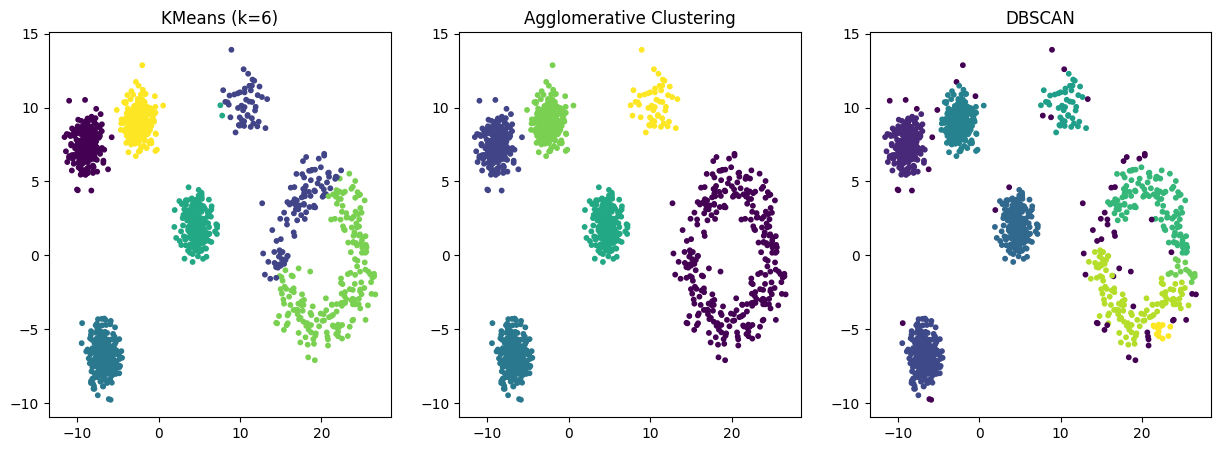

KMeans Silhouette Score: 0.7251181630059241
Agglomerative Silhouette Score: 0.7256900714288006
DBSCAN Silhouette Score: 0.6923413939127293
Best clustering method: Agglomerative


In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
axes[0].set_title(f'KMeans (k={best_n_clusters})')

axes[1].scatter(X[:, 0], X[:, 1], c=agglomerative_labels, cmap='viridis', s=10)
axes[1].set_title('Agglomerative Clustering')

axes[2].scatter(X[:, 0], X[:, 1], c=dbsacn_labels, cmap='viridis', s=10)
axes[2].set_title('DBSCAN')

plt.show()

print("KMeans Silhouette Score:", kmeans_score)
print("Agglomerative Silhouette Score:", agglomerative_score)
print("DBSCAN Silhouette Score:", dbscan_score)
scores = {
    "KMeans": kmeans_score,
    "Agglomerative": agglomerative_score,
    "DBSCAN": dbscan_score

}
best_method = max(scores, key=scores.get)
print(f"Best clustering method: {best_method}")